In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Interpretability libraries
import shap
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
## Loading the dataset into pandas dataframe
df=pd.read_csv('diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
18564,Female,65.0,1,1,never,33.55,8.2,140,1
18565,Male,55.0,0,1,former,30.42,6.2,300,1
18566,Female,61.0,0,0,No Info,34.45,6.5,280,1
18567,Female,58.0,1,0,never,38.31,7.0,200,1


# Exploratory Data Analysis

Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18569 entries, 0 to 18568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               18569 non-null  object 
 1   age                  18569 non-null  float64
 2   hypertension         18569 non-null  int64  
 3   heart_disease        18569 non-null  int64  
 4   smoking_history      18569 non-null  object 
 5   bmi                  18569 non-null  float64
 6   HbA1c_level          18569 non-null  float64
 7   blood_glucose_level  18569 non-null  int64  
 8   diabetes             18569 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:

df.describe()  # Dispalying numerical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18569.000000,18569.000000,18569.000000,18569.000000,18569.000000,18569.000000,18569.000000
mean,49.733248,0.146319,0.083957,29.233480,6.102946,160.737196,0.457752
std,21.757635,0.353435,0.277331,7.349293,1.274961,56.207784,0.498225
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,35.000000,0.000000,0.000000,25.640000,5.700000,130.000000,0.000000
50%,53.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,67.000000,0.000000,0.000000,32.500000,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [6]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,gender,smoking_history
count,18569,18569
unique,3,6
top,Female,never
freq,10488,6942


In [7]:

## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Only encode if not already encoded
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
df.head()   

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


In [8]:
## dropping null values
df=df.dropna(how='any')

In [9]:
df.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

In [10]:
#relationship between variables
corr=df.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
age,1.000000,0.251206,0.251970,0.271248,0.283894,0.263387,0.473534,-0.272726,-0.008799,0.054012,0.216195,0.055328,0.053154,-0.007405,0.007956,-0.021462
hypertension,0.251206,1.000000,0.103784,0.163645,0.159124,0.140110,0.258220,-0.133564,0.008524,0.018945,0.080595,0.051100,0.005164,-0.017394,0.017530,-0.005263
heart_disease,0.251970,0.103784,1.000000,0.054349,0.134068,0.119274,0.215686,-0.062159,0.007266,0.055903,0.108413,-0.047293,0.000825,-0.095391,0.095494,-0.003848
bmi,0.271248,0.163645,0.054349,1.000000,0.200359,0.189337,0.344420,-0.209942,0.036635,0.030643,0.101419,0.072849,0.027471,0.024076,-0.023638,-0.017124
HbA1c_level,0.283894,0.159124,0.134068,0.200359,1.000000,0.324191,0.599595,-0.138769,0.028135,0.024256,0.087736,0.025393,0.025964,-0.048921,0.049052,-0.005015
blood_glucose_level,0.263387,0.140110,0.119274,0.189337,0.324191,1.000000,0.545287,-0.115910,0.031605,0.010084,0.080224,0.015422,0.022279,-0.039157,0.039206,-0.001825
diabetes,0.473534,0.258220,0.215686,0.344420,0.599595,0.545287,1.000000,-0.218032,0.033564,0.041841,0.152057,0.037597,0.035873,-0.074108,0.074410,-0.011679
smoking_history_No Info,-0.272726,-0.133564,-0.062159,-0.209942,-0.138769,-0.115910,-0.218032,1.000000,-0.207097,-0.136001,-0.240695,-0.478623,-0.171422,-0.027229,0.027190,0.001591
smoking_history_current,-0.008799,0.008524,0.007266,0.036635,0.028135,0.031605,0.033564,-0.207097,1.000000,-0.073408,-0.129918,-0.258343,-0.092527,-0.030885,0.030995,-0.004250
smoking_history_ever,0.054012,0.018945,0.055903,0.030643,0.024256,0.010084,0.041841,-0.136001,-0.073408,1.000000,-0.085318,-0.169655,-0.060763,-0.030259,0.030331,-0.002791


Text(0, 0.5, 'Count')

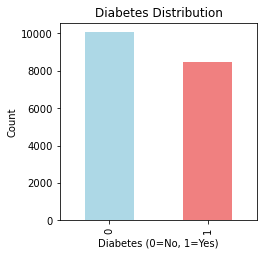

In [11]:
# Visualize class distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')

In [12]:
from sklearn.utils import resample
majority_class = df[df.diabetes == 0]
minority_class = df[df.diabetes == 1]


print("Majority class size:", len(majority_class))
print("Minority class size:", len(minority_class))



Majority class size: 10069
Minority class size: 8500


In [13]:
# minority_class_upsampled = resample(minority_class,
#                                     replace=True,
#                                     n_samples=9000,
#                                     random_state=999)

# df_upsampled = pd.concat([majority_class, minority_class_upsampled])

# df_upsampled['diabetes'].value_counts()

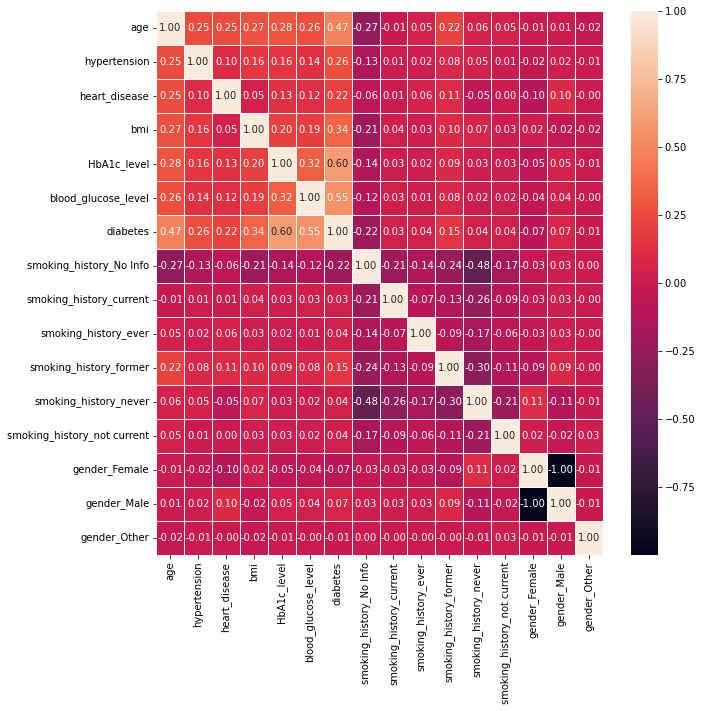

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

 # Feature Engineering

 Splitting the data into features and target variables

In [15]:

# ## Splitting the data into features and target variable
# X = df_upsampled.drop('diabetes', axis=1)
# y = df_upsampled['diabetes']

# print("Feature matrix shape:", X.shape)
# print("Target vector shape:", y.shape)


## Splitting the data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (18569, 15)
Target vector shape: (18569,)


In [16]:
# Split the data (with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Completes set: {X.shape[0]} samples")
print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")




 Completes set: 18569 samples

Train set: 14855 samples
Test set: 3714 samples


In [17]:
# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model development and training

In [18]:
# Initializing models
models = {
    'Random Forest': RandomForestClassifier( class_weight='balanced', random_state=42, max_depth=3),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'SVM': SVC(class_weight='balanced', random_state=42, probability=True, kernel='rbf')
}

# Training individual models and store results
individual_models = {}
individual_predictions = {}
individual_probabilities = {}

print("Training individual models...")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Using scaled data for LR and SVM and  original data for RF
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        test_proba = model.predict_proba(X_test)[:, 1]
    
    # Store model and predictions
    individual_models[name] = model
    individual_predictions[name] = test_pred
    individual_probabilities[name] = test_proba
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, zero_division=0)
    test_recall = recall_score(y_test, test_pred, zero_division=0)
    test_f1 = f1_score(y_test, test_pred, zero_division=0)
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    print(f"Confusion Matrix:\n{cm}")

print("\nIndividual model training completed!")

Training individual models...

Training Random Forest...
Train Accuracy: 0.9005
Test Accuracy: 0.8966
Test Precision: 0.9032
Test Recall: 0.8671
Test F1-Score: 0.8848
Confusion Matrix:
[[1856  158]
 [ 226 1474]]

Training Logistic Regression...
Train Accuracy: 0.8845
Test Accuracy: 0.8858
Test Precision: 0.8692
Test Recall: 0.8835
Test F1-Score: 0.8763
Confusion Matrix:
[[1788  226]
 [ 198 1502]]

Training SVM...
Train Accuracy: 0.8930
Test Accuracy: 0.8899
Test Precision: 0.8678
Test Recall: 0.8959
Test F1-Score: 0.8816
Confusion Matrix:
[[1782  232]
 [ 177 1523]]

Individual model training completed!


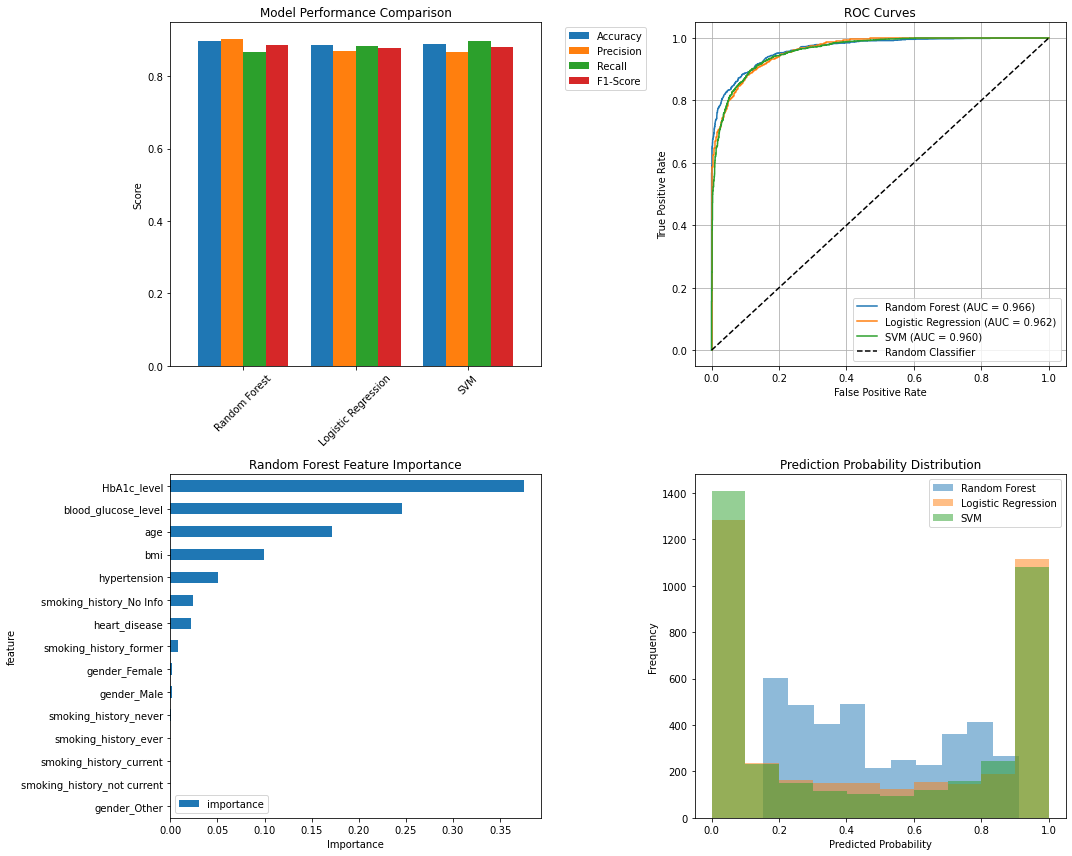


Model Performance Summary:
                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.8966     0.9032  0.8671    0.8848
Logistic Regression    0.8858     0.8692  0.8835    0.8763
SVM                    0.8899     0.8678  0.8959    0.8816


In [19]:
# Create performance comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(individual_models.keys())

performance_data = []
for name in model_names:
    if name in ['Logistic Regression', 'SVM']:
        test_pred = individual_models[name].predict(X_test_scaled)
    else:
        test_pred = individual_models[name].predict(X_test)
    
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, zero_division=0)
    recall = recall_score(y_test, test_pred, zero_division=0)
    f1 = f1_score(y_test, test_pred, zero_division=0)
    
    performance_data.append([accuracy, precision, recall, f1])

performance_df = pd.DataFrame(performance_data, columns=metrics, index=model_names)

# Bar plot of performance metrics
ax1 = axes[0, 0]
performance_df.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Comparison')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(model_names, rotation=45)

# 2. ROC Curves
ax2 = axes[0, 1]
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, individual_probabilities[name])
    auc_score = roc_auc_score(y_test, individual_probabilities[name])
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curves')
ax2.legend()
ax2.grid(True)

# 3. Feature Importance (Random Forest)
ax3 = axes[1, 0]
rf_importance = individual_models['Random Forest'].feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_importance
}).sort_values('importance', ascending=True)

importance_df.plot(x='feature', y='importance', kind='barh', ax=ax3)
ax3.set_title('Random Forest Feature Importance')
ax3.set_xlabel('Importance')

# 4. Prediction Probabilities Distribution
ax4 = axes[1, 1]
for name in model_names:
    ax4.hist(individual_probabilities[name], alpha=0.5, label=name, bins=10)
ax4.set_xlabel('Predicted Probability')
ax4.set_ylabel('Frequency')
ax4.set_title('Prediction Probability Distribution')
ax4.legend()

plt.tight_layout()
plt.show()

# Print performance summary
print("\nModel Performance Summary:")
print("="*40)
print(performance_df.round(4))

In [20]:
# # Create ensemble using VotingClassifier
# print("Creating Ensemble Model...")
# print("="*40)

# # Create individual models for ensemble (with optimal parameters)
# rf_ensemble = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
# lr_ensemble = LogisticRegression(random_state=42, max_iter=1000)
# svm_ensemble = SVC(random_state=42, probability=True, kernel='rbf')

# # Create ensemble with soft voting (uses prediction probabilities)
# ensemble_model = VotingClassifier(
#     estimators=[
#         ('rf', rf_ensemble),
#         ('lr', lr_ensemble),
#         ('svm', svm_ensemble)
#     ],
#     voting='soft'
# )

# # Train ensemble model
# # Note: We need to handle different scaling requirements
# # Create a custom ensemble approach

# class CustomEnsemble:
#     def __init__(self, rf_model, lr_model, svm_model, scaler):
#         self.rf_model = rf_model
#         self.lr_model = lr_model
#         self.svm_model = svm_model
#         self.scaler = scaler
        
#     def fit(self, X, y):
#         # Train Random Forest on original data
#         self.rf_model.fit(X, y)
        
#         # Train LR and SVM on scaled data
#         X_scaled = self.scaler.fit_transform(X)
#         self.lr_model.fit(X_scaled, y)
#         self.svm_model.fit(X_scaled, y)
        
#     def predict(self, X):
#         # Get predictions from all models
#         rf_pred = self.rf_model.predict(X)
        
#         X_scaled = self.scaler.transform(X)
#         lr_pred = self.lr_model.predict(X_scaled)
#         svm_pred = self.svm_model.predict(X_scaled)
        
#         # Majority voting
#         predictions = np.column_stack([rf_pred, lr_pred, svm_pred])
#         ensemble_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
        
#         return ensemble_pred
    
#     def predict_proba(self, X):
#         # Get prediction probabilities from all models
#         rf_proba = self.rf_model.predict_proba(X)[:, 1]
        
#         X_scaled = self.scaler.transform(X)
#         lr_proba = self.lr_model.predict_proba(X_scaled)[:, 1]
#         svm_proba = self.svm_model.predict_proba(X_scaled)[:, 1]
        
#         # Average probabilities
#         avg_proba = (rf_proba + lr_proba + svm_proba) / 3
        
#         # Return probabilities for both classes
#         return np.column_stack([1 - avg_proba, avg_proba])

# # Initialize and train custom ensemble
# ensemble = CustomEnsemble(
#     RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3),
#     LogisticRegression(random_state=42, max_iter=1000),
#     SVC(random_state=42, probability=True, kernel='rbf'),
#     StandardScaler()
# )

# ensemble.fit(X_train, y_train)

# # Make predictions
# ensemble_pred = ensemble.predict(X_test)
# ensemble_proba = ensemble.predict_proba(X_test)[:, 1]

# # Calculate ensemble performance
# ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
# ensemble_precision = precision_score(y_test, ensemble_pred, zero_division=0)
# ensemble_recall = recall_score(y_test, ensemble_pred, zero_division=0)
# ensemble_f1 = f1_score(y_test, ensemble_pred, zero_division=0)
# ensemble_auc = roc_auc_score(y_test, ensemble_proba)

# print(f"Ensemble Model Performance:")
# print(f"Accuracy: {ensemble_accuracy:.4f}")
# print(f"Precision: {ensemble_precision:.4f}")
# print(f"Recall: {ensemble_recall:.4f}")
# print(f"F1-Score: {ensemble_f1:.4f}")
# print(f"AUC Score: {ensemble_auc:.4f}")

# print(f"\nConfusion Matrix:")
# print(confusion_matrix(y_test, ensemble_pred))




import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class CustomEnsemble:
    def __init__(self, models):
        self.models = models
        
    def predict(self, X):
        # Collect predictions from each model
        predictions = np.column_stack([self.models[name].predict(X) for name in self.models])
        # Majority voting
        ensemble_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
        return ensemble_pred
    
    def predict_proba(self, X):
        # Collect probabilities from each model
        probabilities = np.column_stack([self.models[name].predict_proba(X)[:, 1] for name in self.models])
        # Average probabilities
        avg_proba = probabilities.mean(axis=1)
        return np.column_stack([1 - avg_proba, avg_proba])

# Initialize the ensemble with already trained individual models
ensemble_model = CustomEnsemble(individual_models)

# Make predictions using the ensemble
ensemble_pred = ensemble_model.predict(X_test_scaled)  # Use the scaled data for LR and SVM
ensemble_proba = ensemble_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ensemble performance
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, zero_division=0)
ensemble_recall = recall_score(y_test, ensemble_pred, zero_division=0)
ensemble_f1 = f1_score(y_test, ensemble_pred, zero_division=0)

print("Ensemble Model Performance:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1-Score: {ensemble_f1:.4f}")

# Confusion Matrix for the ensemble predictions
ensemble_cm = confusion_matrix(y_test, ensemble_pred)
print(f"Confusion Matrix:\n{ensemble_cm}")

Ensemble Model Performance:
Accuracy: 0.8891
Precision: 0.8838
Recall: 0.8724
F1-Score: 0.8780
Confusion Matrix:
[[1819  195]
 [ 217 1483]]


Final Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score     AUC
0        Random Forest    0.8966     0.9032  0.8671    0.8848  0.9662
1  Logistic Regression    0.8858     0.8692  0.8835    0.8763  0.9623
2                  SVM    0.8899     0.8678  0.8959    0.8816  0.9604
3             Ensemble    0.8891     0.8838  0.8724    0.8780  0.9623


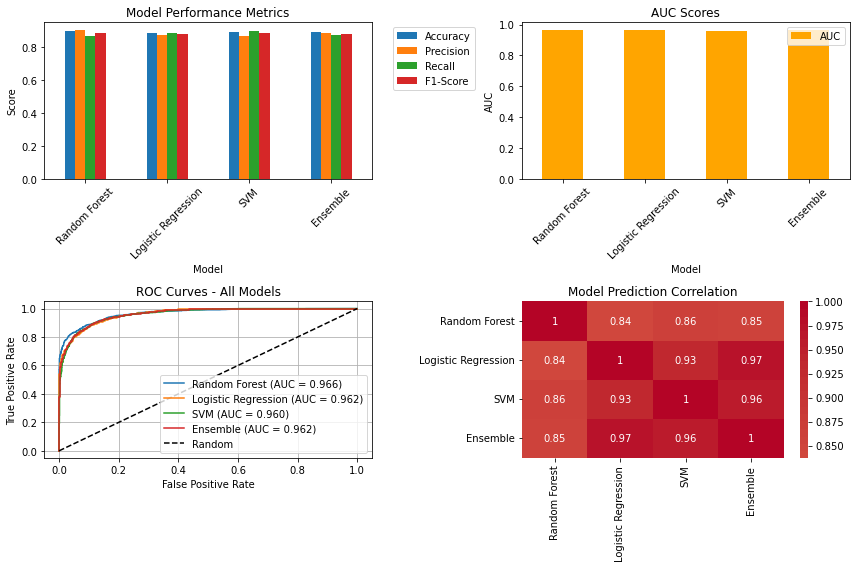


Best performing model: Random Forest
F1-Score: 0.8848


In [21]:
# Compare all models including ensemble
all_models = {**individual_models, 'Ensemble': ensemble_model}
all_predictions = {**individual_predictions, 'Ensemble': ensemble_pred}
all_probabilities = {**individual_probabilities, 'Ensemble': ensemble_proba}

# Create comprehensive comparison
comparison_data = []
for name in all_models.keys():
    if name == 'Ensemble':
        pred = ensemble_pred
        proba = ensemble_proba
    elif name in ['Logistic Regression', 'SVM']:
        pred = all_models[name].predict(X_test_scaled)
        proba = all_models[name].predict_proba(X_test_scaled)[:, 1]
    else:
        pred = all_models[name].predict(X_test)
        proba = all_models[name].predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, zero_division=0)
    recall = recall_score(y_test, pred, zero_division=0)
    f1 = f1_score(y_test, pred, zero_division=0)
    auc = roc_auc_score(y_test, proba)
    
    comparison_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

comparison_df = pd.DataFrame(comparison_data)
print("Final Model Comparison:")
print("="*50)
print(comparison_df.round(4))

# Visualize final comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
comparison_df.plot(x='Model', y='AUC', kind='bar', ax=plt.gca(), color='orange')
plt.title('AUC Scores')
plt.ylabel('AUC')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# ROC curves for all models
for name in all_models.keys():
    if name == 'Ensemble':
        proba = ensemble_proba
    elif name in ['Logistic Regression', 'SVM']:
        proba = all_models[name].predict_proba(X_test_scaled)[:, 1]
    else:
        proba = all_models[name].predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
# Model agreement analysis
predictions_df = pd.DataFrame(all_predictions)
correlation_matrix = predictions_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
plt.title('Model Prediction Correlation')

plt.tight_layout()
plt.show()

# Best model identification
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model}")
print(f"F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")

In [22]:
import numpy as np
import pandas as pd

# Example input (replace with real values matching your feature order)
sample_data = pd.DataFrame([{
    'age': 72,
    'bmi': 27.94,
    'hypertension': 0,
    'heart_disease': 1,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 130,
    'gender_female': 1,
    'gender_male': 0,
    'gender_Other': 0,
    'smoking_history_never': 0,
    'smoking_history_current': 0,
    'smoking_history_former': 1,
    'smoking_history_ever': 0,
    'smoking_history_not current': 0,
    'smoking_history_No Info': 0
}])

# Make prediction
prediction = ensemble_model.predict(sample_data)
probability = ensemble_model.predict_proba(sample_data)[:, 1]

print("Predicted class:", prediction[0])
print("Probability of Diabetes:", probability[0])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- gender_female
- gender_male
Feature names seen at fit time, yet now missing:
- gender_Female
- gender_Male


In [ ]:
# Create a sample data point for prediction
sample_data = pd.DataFrame([{
    'age': 72,
    'bmi': 27.94,
    'hypertension': 0,
    'heart_disease': 1,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 130,
    'gender_female': 1,
    'gender_male': 0,
    'gender_Other': 0,
    'smoking_history_never': 0,
    'smoking_history_current': 0,
    'smoking_history_former': 1,
    'smoking_history_ever': 0,
    'smoking_history_not current': 0,
    'smoking_history_No Info': 0
}])

# Make a prediction
prediction = ensemble_model.predict(sample_data)
prediction_proba = ensemble_model.predict_proba(sample_data)

print(f"\nPrediction for sample data: {'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}")
print(f"Prediction probabilities: {prediction_proba}")

# # Explain the prediction with SHAP
# # Create a SHAP explainer for the loaded model
# explainer = shap.KernelExplainer(loaded_model.predict_proba, shap.sample(X_train, 100))

# # Get the feature names after one-hot encoding
# ohe_feature_names = loaded_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# feature_names = numerical_features + list(ohe_feature_names)

# # Transform the sample data using the preprocessor
# transformed_sample = loaded_model.named_steps['preprocessor'].transform(sample_data)

# # Calculate SHAP values for the sample data
# shap_values = explainer.shap_values(transformed_sample)

# # Generate a force plot to explain the prediction
# shap.initjs()
# force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], transformed_sample, feature_names=feature_names, show=False)
# shap.save_html("shap_explanation.html", force_plot)

# print("\nSHAP explanation for the prediction has been saved to shap_explanation.html")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- gender_female
- gender_male
Feature names seen at fit time, yet now missing:
- gender_Female
- gender_Male


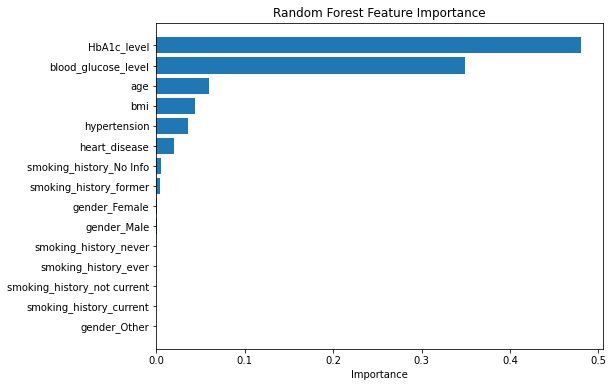

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances (averaged if ensemble is stacking/voting)
importances = individual_models['Random Forest'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()


Missing values:
age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

Class distribution:
0    91500
1     8500
Name: diabetes, dtype: int64

Class balance: 0    0.915
1    0.085
Name: diabetes, dtype: float64


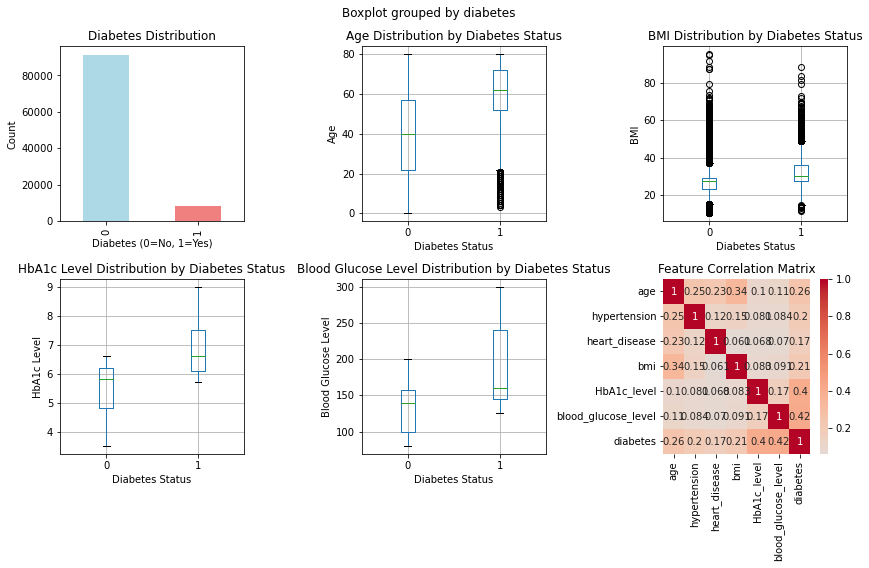


Categorical feature analysis:
Gender distribution by diabetes:


KeyError: 'gender'

In [ ]:
# # Check for missing values
# print("Missing values:")
# print(df.isnull().sum())

# # Check class distribution
# print("\nClass distribution:")
# print(df['diabetes'].value_counts())
# print(f"\nClass balance: {df['diabetes'].value_counts(normalize=True)}")

# # Visualize class distribution
# plt.figure(figsize=(12, 8))

# plt.subplot(2, 3, 1)
# df['diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
# plt.title('Diabetes Distribution')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')

# # Age distribution by diabetes status
# plt.subplot(2, 3, 2)
# df.boxplot(column='age', by='diabetes', ax=plt.gca())
# plt.title('Age Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('Age')

# # BMI distribution by diabetes status
# plt.subplot(2, 3, 3)
# df.boxplot(column='bmi', by='diabetes', ax=plt.gca())
# plt.title('BMI Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('BMI')

# # HbA1c level distribution by diabetes status
# plt.subplot(2, 3, 4)
# df.boxplot(column='HbA1c_level', by='diabetes', ax=plt.gca())
# plt.title('HbA1c Level Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('HbA1c Level')

# # Blood glucose level distribution by diabetes status
# plt.subplot(2, 3, 5)
# df.boxplot(column='blood_glucose_level', by='diabetes', ax=plt.gca())
# plt.title('Blood Glucose Level Distribution by Diabetes Status')
# plt.xlabel('Diabetes Status')
# plt.ylabel('Blood Glucose Level')

# # Correlation heatmap for numerical features
# plt.subplot(2, 3, 6)
# numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
# correlation_matrix = df[numerical_cols].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
# plt.title('Feature Correlation Matrix')

# plt.tight_layout()
# plt.show()

# # Additional categorical analysis
# print("\nCategorical feature analysis:")
# print("Gender distribution by diabetes:")
# print(pd.crosstab(df['gender'], df['diabetes'], normalize='columns'))
# print("\nSmoking history distribution by diabetes:")
# print(pd.crosstab(df['smoking_history'], df['diabetes'], normalize='columns'))

In [ ]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# import matplotlib.pyplot as plt
# import numpy as np

# # Visualizing the original class distribution
# plt.figure(figsize=(6, 4))
# df['Diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Diabetes Distribution')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

# # Separate features and target
# X = df.drop('Diabetes', axis=1)  # Features (empty in this case)
# y = df['Diabetes']                # Target

# # Oversampling using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Visualizing the oversampled class distribution
# plt.figure(figsize=(6, 4))
# pd.Series(y_resampled).value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Diabetes Distribution After SMOTE')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

# # Undersampling using RandomUnderSampler
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled_undersampled, y_resampled_undersampled = undersampler.fit_resample(X, y)

# # Visualizing the undersampled class distribution
# plt.figure(figsize=(6, 4))
# pd.Series(y_resampled_undersampled).value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Diabetes Distribution After Undersampling')
# plt.xlabel('Diabetes (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (/home/tynash/anaconda/lib/python3.9/site-packages/sklearn/base.py)

In [ ]:
#  rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)                                                                          │
#  │     44 lr_clf = LogisticRegression(random_state=42, max_iter=1000)                                                                                 │
#  │     45 svm_clf = SVC(probability=True, random_state=42)                                                                                            │
#  │     46                                                                                                                                             │
#  │     47 # Create the ensemble model with a VotingClassifier                                                                                         │
#  │     48 ensemble_clf = VotingClassifier(                                                                                                            │
#  │     49     estimators=[('rf', rf_clf), ('lr', lr_clf), ('svm', svm_clf)],                                                                          │
#  │     50     voting='soft'                                                                                                                           │
#  │     51 )                                                                                                                                           │
#  │     52                                                                                                                                             │
#  │     53 # Create the full pipeline                                                                                                                  │
#  │     54 pipeline = Pipeline(steps=[('preprocessor', preprocessor),                                                                                  │
#  │     55                             ('classifier', ensemble_clf)])                                                                                  │
#  │     56                                                                                                                                             │
#  │     57 # Train the model                                                                                                                           │
#  │     58 pipeline.fit(X_train, y_train)                                                                                                              │
#  │     59                                                                                                                                             │
#  │     60 # Save the trained model to a pickle file                                                                                                   │
#  │     61 with open('ensemble_model.pkl', 'wb') as f:                                                                                                 │
#  │     62     pickle.dump(pipeline, f)                                                                                                                │
#  │     63                                                                                                                                             │
#  │     64 print("Model trained and saved as ensemble_model.pkl")                                                                                      │
#  │     65                                                                                                                                             │
#  │     66 # Load the saved model                                                                                                                      │
#  │     67 with open('ensemble_model.pkl', 'rb') as f:                                                                                                 │
#  │     68     loaded_model = pickle.load(f)                                                                                                           │
#  │     69                                                                                                                                             │
#  │     70 print("Model loaded from ensemble_model.pkl")                                                                                               │
#  │     71                                                                                                                                             │
#  │     72 # Create a sample data point for prediction                                                                                                 │
#  │     73 sample_data = pd.DataFrame({                                                                                                                │
#  │     74     'gender': ['Female'],                                                                                                                   │
#  │     75     'age': [80.0],                                                                                                                          │
#  │     76     'hypertension': [0],                                                                                                                    │
#  │     77     'heart_disease': [1],                                                                                                                   │
#  │     78     'smoking_history': ['never'],                                                                                                           │
#  │     79     'bmi': [25.19],                                                                                                                         │
#  │     80     'HbA1c_level': [6.6],                                                                                                                   │
#  │     81     'blood_glucose_level': [140]                                                                                                            │
#  │     82 })                                                                                                                                          │
#  │     83                                                                                                                                             │
#  │     84 # Make a prediction                                                                                                                         │
#  │     85 prediction = loaded_model.predict(sample_data)                                                                                              │
#  │     86 prediction_proba = loaded_model.predict_proba(sample_data)                                                                                  │
#  │     87                                                                                                                                             │
#  │     88 print(f"\nPrediction for sample data: {{'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}}")                                            │
#  │     89 print(f"Prediction probabilities: {prediction_proba}")                                                                                      │
#  │     90                                                                                                                                             │
#  │     91 # Explain the prediction with SHAP                                                                                                          │
#  │     92 # Create a SHAP explainer for the loaded model                                                                                              │
#  │     93 explainer = shap.KernelExplainer(loaded_model.predict_proba, shap.sample(X_train, 100))                                                     │
#  │     94                                                                                                                                             │
#  │     95 # Get the feature names after one-hot encoding                                                                                              │
#  │     96 ohe_feature_names = loaded_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)         │
#  │     97 feature_names = numerical_features + list(ohe_feature_names)                                                                                │
#  │     98                                                                                                                                             │
#  │     99 # Transform the sample data using the preprocessor                                                                                          │
#  │    100 transformed_sample = loaded_model.named_steps['preprocessor'].transform(sample_data)                                                        │
#  │    101                                                                                                                                             │
#  │    102 # Calculate SHAP values for the sample data                                                                                                 │
#  │    103 shap_values = explainer.shap_values(transformed_sample)                                                                                     │
#  │    104                                                                                                                                             │
#  │    105 # Generate a force plot to explain the prediction                                                                                           │
#  │    106 shap.initjs()                                                                                                                               │
#  │    107 force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], transformed_sample, feature_names=feature_names, show=False)      │
#  │    108 shap.save_html("shap_explanation.html", force_plot)                                                                                         │
#  │    109                                                                                                                                             │
#  │    110                                                                                                                                             │
#  │    111 print("\nSHAP explanation for the prediction has been saved to shap_explanation.html")    

     |████████████████████████████████| 258 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.5 MB 2.7 MB/s eta 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [ ]:
# import pandas as pd
# import numpy as np

# ## Loading the dataset into pandas dataframe
# df=pd.read_csv('diabetes_dataset.csv')
# df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# ## Encoding categorical variables
# from sklearn.preprocessing import LabelEncoder
# # Only encode if not already encoded
# if 'smoking_history' in df.columns:
#     df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
# df.head()   

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


In [ ]:
# ## Splitting the data into features and target variable
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# print("Feature matrix shape:", X.shape)
# print("Target vector shape:", y.shape)

Feature matrix shape: (100000, 15)
Target vector shape: (100000,)


0    0.915
1    0.085
Name: diabetes, dtype: float64


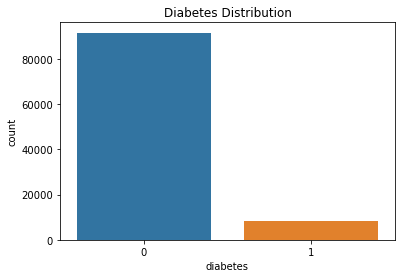

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Check class distribution
# print(y.value_counts(normalize=True))

# # Visualize imbalance
# sns.countplot(x=y)
# plt.title("Diabetes Distribution")
# plt.show()


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print("Before:", y.value_counts())
# print("After:", y_resampled.value_counts())


/home/tynash/anaconda/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before: 0    91500
1     8500
Name: diabetes, dtype: int64
After: 0    91500
1    91500
Name: diabetes, dtype: int64


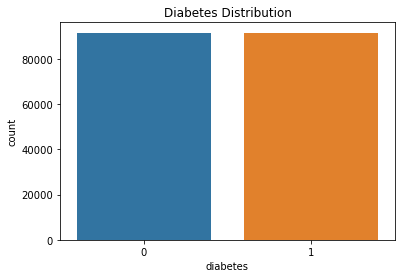

In [ ]:
# sns.countplot(x=y_resampled)
# plt.title("Diabetes Distribution")
# plt.show()